# YELP Reviews - Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Data Import

In [2]:
df = pd.read_json(os.path.join('..', 'data', 'yelp_reviews.json.gz'), 
                  compression='gzip', lines=True)

# Data shape
df.shape

(125000, 9)

In [3]:
# Print a data sample
df.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
73794,sif0nVVwmNIcmovp74qWqg,TSxpgqzG0u38CGyyLfSAAg,1d6c6Q2j2jwVzBfX_dLHlg,3,2,1,1,"Cowboy Ciao states, ""Our aim is simple and tru...",2008-06-03 15:52:01
65218,0LsXHTOFwsK-7MayxGrjQg,5qYWXXVRHM2hP7za5KTHjQ,tUFMDX155FxhNX3sQb2dDQ,4,0,0,0,This place was $$$$. I did the shack burger a...,2016-10-02 01:22:15
24211,z6S5hIgV6Xa9z0V92LPtng,7svBs9qqPJHPRXZ56Q3ZuQ,IBNWrN1k9E0E_bMcRD-GwA,3,2,0,1,Ate here a few times before when they first op...,2016-12-21 04:00:45
29242,_o3H9JEBKlL0JrrMNw7pHQ,HA4KqFmrY7gzBXzAhmS2bg,h36qA5gnNTgByhxWx1aH-Q,4,1,0,3,"Want lobster, but don't want to go through the...",2015-07-29 12:43:36
20139,d_JTum6PtrLyzbfwWth2gA,pZH2XfNyblv1ZednrPTLuw,bzUSbd9YLoK3egnTkXFd1Q,5,1,0,0,"Delicious food, fast service, grade A on clean...",2014-03-15 03:04:57


We'll only use `text` as our predictive variable, while `stars` will be the target variable. Next, we'll take a closer look at them. The other features will be discarded.

## Stars Distribution

In `data_utils.py` we generated the dataset we are going to work with in such a way that every star rating category contains 25,000 reviews. Here, we will just double check that data extraction was successfull and ratings distribution looks exactly as we expect. The same (large) number of reviews per star rating category ensures that the model sees diverse examples per each category and, at the same time, will not overfit.

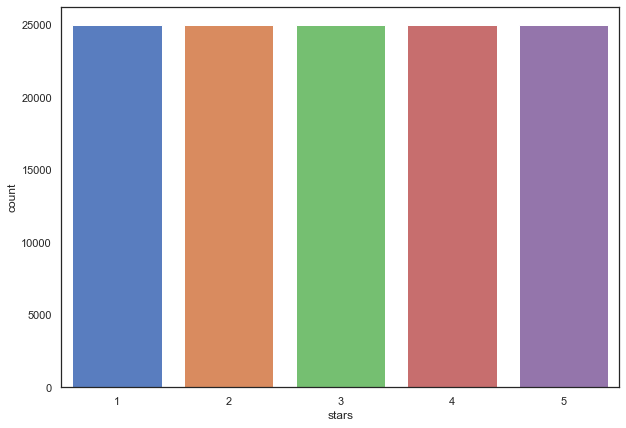

In [19]:
sns.set(style="white", palette="muted", color_codes=True) 

plt.figure(figsize=(10,7))
sns.countplot(df['stars'])
plt.show()

The counts satisfy our expectations :)

## Most Popular Words per Star Rating

We'll create word clouds for visualisation and won't bother about actual numbers so far. The word clouds will give us a general impression about words distribution per star rating.

Rating: 1 stars


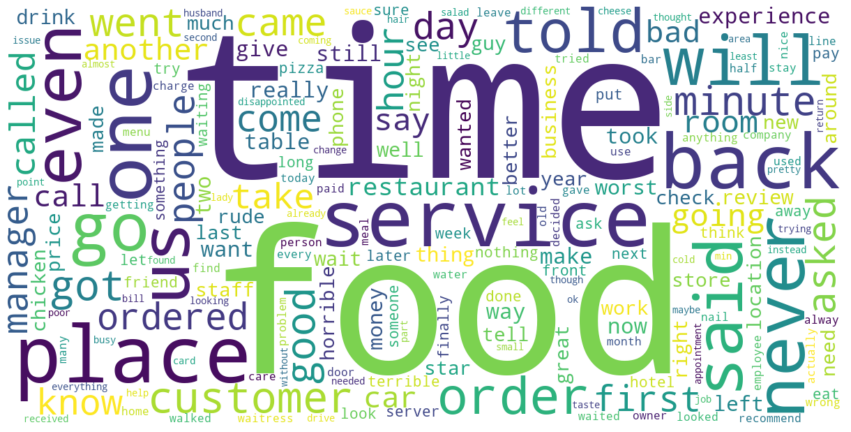

*************************
Rating: 2 stars


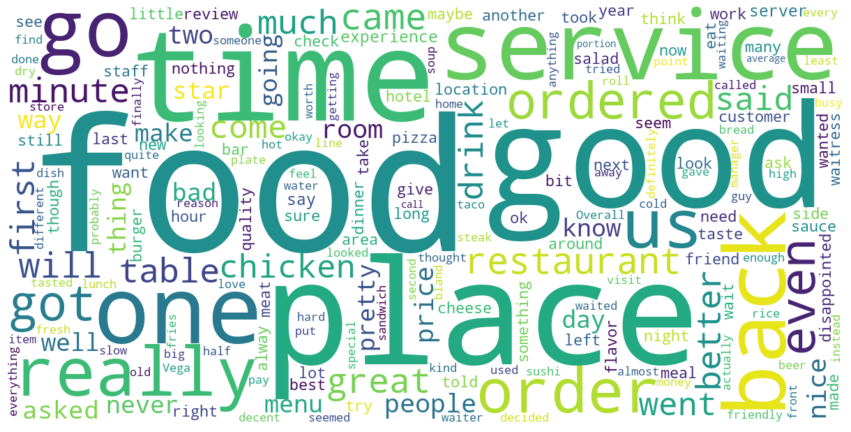

*************************
Rating: 3 stars


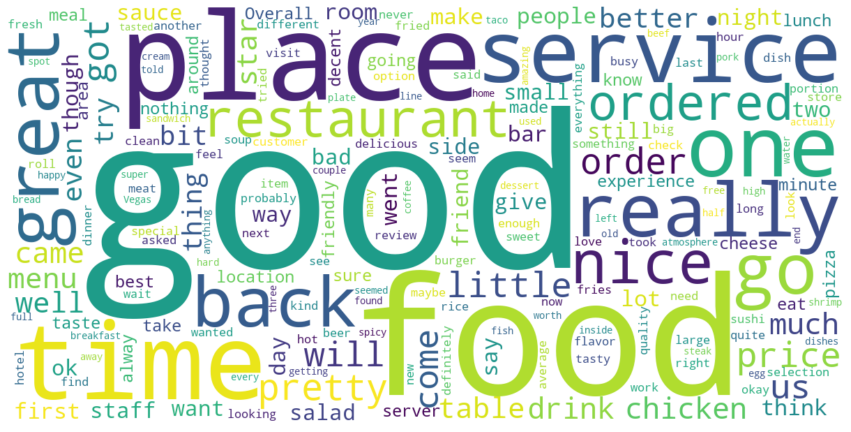

*************************
Rating: 4 stars


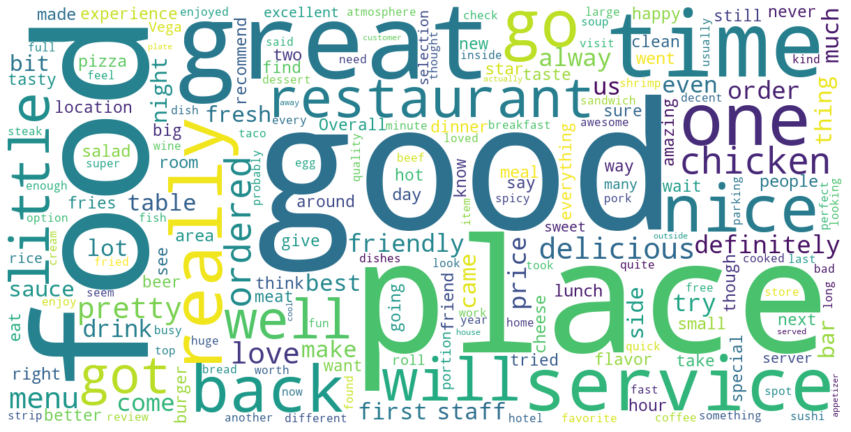

*************************
Rating: 5 stars


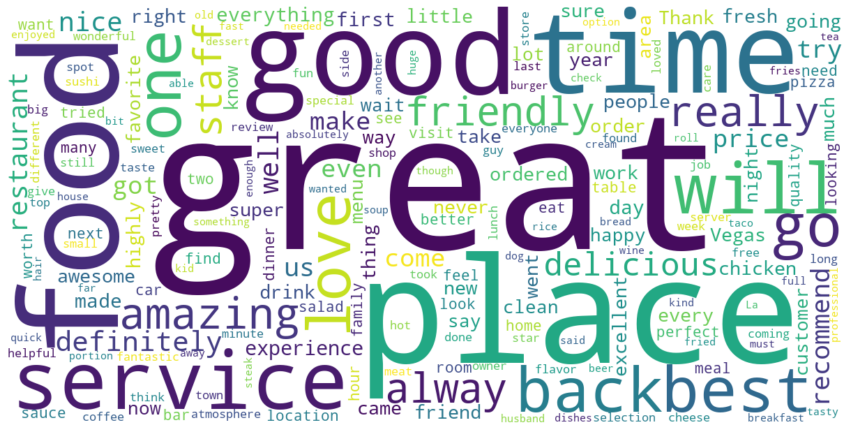

*************************


In [5]:
for rating in sorted(df['stars'].unique()):
    print(f'Rating: {rating} stars')
    
    # Create a single line of text to feed it to WordCloud
    text = ' '.join(review for review in df[df['stars'] == rating]['text'].values)

    # WordCloud uses a built-in stopwords list
    wordcloud = WordCloud(collocations=False, background_color='white', width=1200, height=600).generate(text)

    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    print('*' * 25)

We can note that the task might not be as simple as seemed to be at the first glance. 

In particular, there is a significant overlap among the star ratings, since words 'good', 'food', 'service', 'time' and others appear in nearly all categories. This fact alone does not mean much, though. After all, these are just single words (unigrams) and all of them can be modified in a sentence to mean something positive or negative. However, it will most likely represent a problem for bag-of-words model, whereas RNN- and transformer-based models should be able to handle this better.

Another possible complication might consist in distinguishing between two 'adjacent' star ratings, e.g. 4 and 5. There is even bigger word overlap in such cases. One possible cause is the fact that different people are biased in different ways due to various reasons. In other words, an espresso that I personally love to drink at a specific café every morning and would rate with 5 stars might not feel so perfect for a professional barista who would rate it with 4 or even 3 stars.

On the other hand, 1 star rating cloud certainly contains more words with negative connotation (horrible, problem, left, wrong, issue, etc.) and 5 star rating cloud has mostly words with positive one (delicious, best, friendly, favorite, amazing, awesome, pretty and so on). Thus, polar ratings should not be difficult to recognize.

## Review Length Distribution

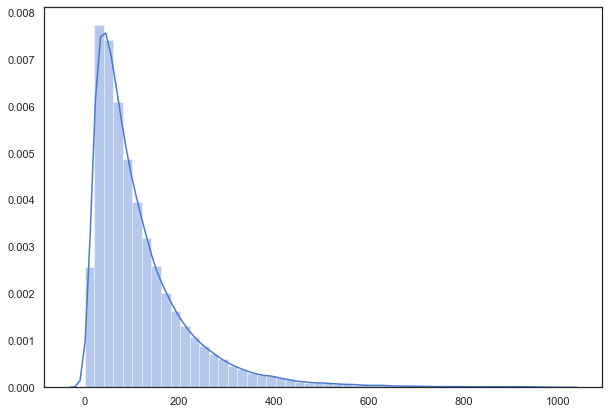

In [20]:
# Review length distribution measured in words
plt.figure(figsize=(10,7))
sns.distplot([len(txt.split()) for txt in df['text'].values])
plt.show()

Overall, most reviews tend to be not too long and do not exceed 300-400 words. The tail of the distribution gets thinner as the number of words increases, which is a rather expected effect. Now, let's see if anything chages for different star ratings.

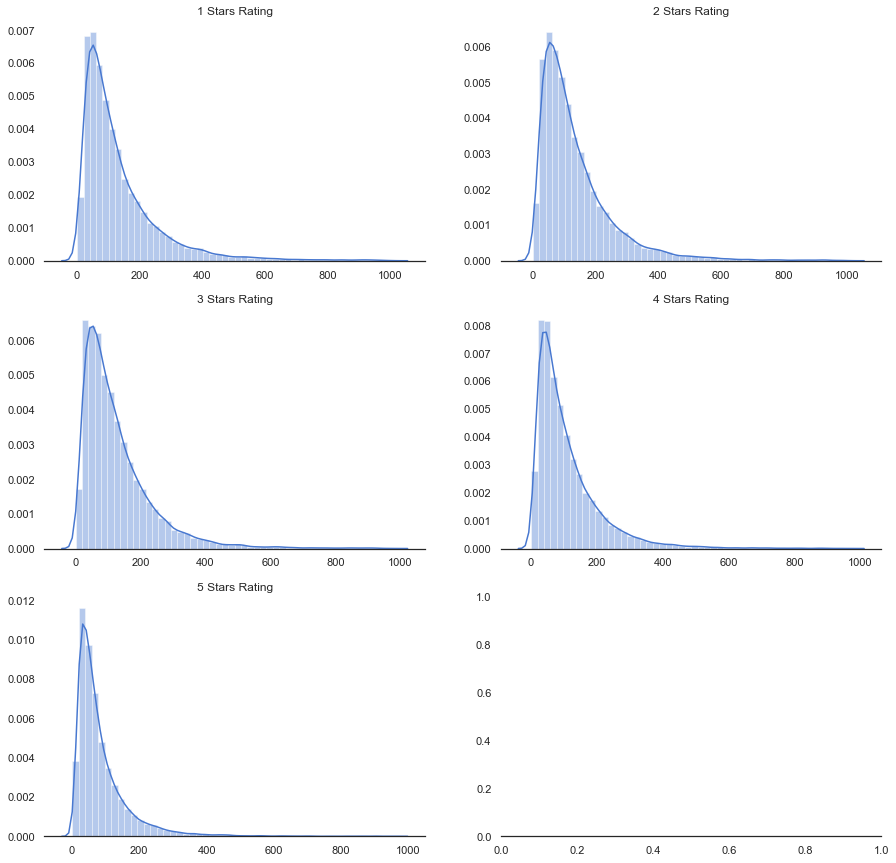

In [41]:
# Set up a plt figure for multiple plots
f, axes = plt.subplots(3, 2, figsize=(15,15), sharex=False)
sns.despine(left=True)

# 
plot_y = 0
for idx, stars in enumerate([1, 2, 3, 4, 5]):
    plot_x = 0 if idx % 2 == 0 else 1
    
    
    sns.distplot(
        [len(txt.split()) for txt in df[df['stars'] == stars]['text'].values], 
        color="b", ax=axes[plot_y, plot_x]).set_title(f'{stars} Stars Rating')
    
    plot_y += 1 if idx % 2 == 1 else 0

The distribution seems to be pretty consistent across all star ratings. The only slight deviation can be pointed out in the 5 stars rating category, where most reviews tend to be even shorter.